In [2]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results06 = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(results06)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [20]:
#  3. Convert the June temperatures to a list.
temp06_list = list(np.ravel(results06))
print(temp06_list)


[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(temp06_list, columns=['June Temps'])
june_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


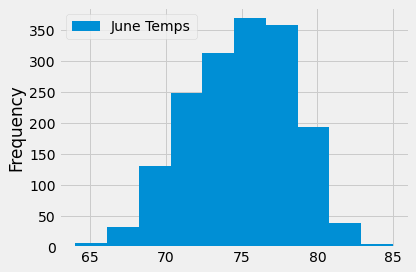

In [10]:
june_temp_df.plot.hist(bins=10)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [14]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results12 = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(results12)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [15]:
# 7. Convert the December temperatures to a list.
temp12_list = list(np.ravel(results12))
print(temp12_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [13]:
# 7. Convert the December temperatures to a list.
#final_result12 = [list(i) for i in results12]
#final_result12

In [16]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(temp12_list, columns=['December Temps'])
dec_temp_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


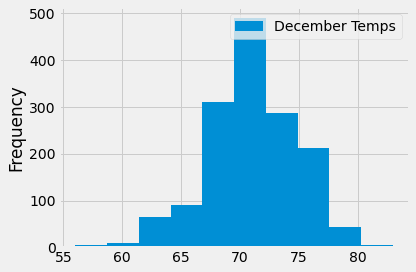

In [17]:
dec_temp_df.plot.hist(bins=10)
plt.tight_layout()

In [18]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
#Diliverable 3==============================================

In [ ]:
#======stationwise June/December temperature queries=========

In [ ]:
#========Junetemp=========================================

In [15]:
sel_min_avg_max06 = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
june_min_avg_max = session.query(*sel_min_avg_max06).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
june_min_avg_max


[('USC00511918', 66.0, 74.13939393939394, 85.0),
 ('USC00513117', 68.0, 74.05084745762711, 83.0),
 ('USC00514830', 67.0, 76.00537634408602, 81.0),
 ('USC00516128', 66.0, 71.9372197309417, 79.0),
 ('USC00517948', 64.0, 76.6554054054054, 82.0),
 ('USC00518838', 67.0, 73.39473684210526, 78.0),
 ('USC00519281', 65.0, 73.27118644067797, 82.0),
 ('USC00519397', 70.0, 77.55932203389831, 84.0),
 ('USC00519523', 71.0, 76.66810344827586, 82.0)]

In [17]:
june_temp_station_df = pd.DataFrame(june_min_avg_max, columns=['station-June','min_temp','max_temp','avg_temp'])
june_temp_station_df

,station-June,min_temp,max_temp,avg_temp
0,USC00511918,66.0,74.139394,85.0
1,USC00513117,68.0,74.050847,83.0
2,USC00514830,67.0,76.005376,81.0
3,USC00516128,66.0,71.937220,79.0
4,USC00517948,64.0,76.655405,82.0
5,USC00518838,67.0,73.394737,78.0
6,USC00519281,65.0,73.271186,82.0
7,USC00519397,70.0,77.559322,84.0
8,USC00519523,71.0,76.668103,82.0


In [ ]:
#========Dectemp=========================================

In [16]:
sel_min_avg_max12 = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs), 
       func.max(Measurement.tobs)]
dec_min_avg_max = session.query(*sel_min_avg_max12).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
dec_min_avg_max

[('USC00511918', 57.0, 69.6842105263158, 81.0),
 ('USC00513117', 63.0, 71.06944444444444, 80.0),
 ('USC00514830', 62.0, 73.2247191011236, 79.0),
 ('USC00516128', 60.0, 69.29126213592232, 83.0),
 ('USC00517948', 64.0, 71.8348623853211, 82.0),
 ('USC00518838', 63.0, 72.42105263157895, 78.0),
 ('USC00519281', 58.0, 69.90322580645162, 79.0),
 ('USC00519397', 56.0, 71.10952380952381, 77.0),
 ('USC00519523', 56.0, 72.43333333333334, 79.0)]

In [35]:
Dec_temp_station_df = pd.DataFrame(dec_min_avg_max, columns=['station-December','min_temp','max_temp','avg_temp'])
Dec_temp_station_df

,station-December,min_temp,max_temp,avg_temp
0,USC00511918,57.0,69.684211,81.0
1,USC00513117,63.0,71.069444,80.0
2,USC00514830,62.0,73.224719,79.0
3,USC00516128,60.0,69.291262,83.0
4,USC00517948,64.0,71.834862,82.0
5,USC00518838,63.0,72.421053,78.0
6,USC00519281,58.0,69.903226,79.0
7,USC00519397,56.0,71.109524,77.0
8,USC00519523,56.0,72.433333,79.0


In [ ]:
#======stationwise June/December percipitation queries=========

In [ ]:
#=======June===============================

In [25]:
sel_prcp_06 = [Measurement.station, 
       func.min(Measurement.prcp), 
       func.avg(Measurement.prcp), 
       func.max(Measurement.prcp)]
june_prcp_station = session.query(*sel_prcp_06).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
june_prcp_station

[('USC00511918', 0.0, 0.015157232704402513, 0.58),
 ('USC00513117', 0.0, 0.11824786324786322, 4.43),
 ('USC00514830', 0.0, 0.11419161676646702, 3.6),
 ('USC00516128', 0.0, 0.4957476635514022, 2.8),
 ('USC00517948', 0.0, 0.057974683544303796, 1.71),
 ('USC00518838', 0.0, 0.09461538461538463, 0.82),
 ('USC00519281', 0.0, 0.15152542372881356, 1.39),
 ('USC00519397', 0.0, 0.022660944206008553, 0.89),
 ('USC00519523', 0.0, 0.05004424778761062, 0.51)]

In [26]:
June_prcp_station_df = pd.DataFrame(june_prcp_station, columns=['station-June','min_prcp','max_prcp','avg_prcp'])
June_prcp_station_df

,station-December,min_prcp,max_prcp,avg_prcp
0,USC00511918,0.0,0.015157,0.58
1,USC00513117,0.0,0.118248,4.43
2,USC00514830,0.0,0.114192,3.60
3,USC00516128,0.0,0.495748,2.80
4,USC00517948,0.0,0.057975,1.71
5,USC00518838,0.0,0.094615,0.82
6,USC00519281,0.0,0.151525,1.39
7,USC00519397,0.0,0.022661,0.89
8,USC00519523,0.0,0.050044,0.51


In [ ]:
#==========December===================================

In [28]:
sel_prcp_12 = [Measurement.station, 
       func.min(Measurement.prcp), 
       func.avg(Measurement.prcp), 
       func.max(Measurement.prcp)]
dec_prcp_station = session.query(*sel_prcp_12).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
dec_prcp_station

[('USC00511918', 0.0, 0.13814569536423846, 4.0),
 ('USC00513117', 0.0, 0.20324074074074094, 4.94),
 ('USC00514830', 0.0, 0.15496598639455791, 2.55),
 ('USC00516128', 0.0, 0.5070050761421321, 6.42),
 ('USC00517948', 0.0, 0.15272727272727266, 2.8),
 ('USC00518838', 0.02, 0.6381818181818182, 2.5),
 ('USC00519281', 0.0, 0.2449308755760371, 3.14),
 ('USC00519397', 0.0, 0.07531400966183568, 2.01),
 ('USC00519523', 0.0, 0.1620098039215687, 4.95)]

In [29]:
Dec_prcp_station_df = pd.DataFrame(dec_prcp_station, columns=['station-December','min_prcp','max_prcp','avg_prcp'])
Dec_prcp_station_df

,station-December,min_prcp,max_prcp,avg_prcp
0,USC00511918,0.00,0.138146,4.00
1,USC00513117,0.00,0.203241,4.94
2,USC00514830,0.00,0.154966,2.55
3,USC00516128,0.00,0.507005,6.42
4,USC00517948,0.00,0.152727,2.80
5,USC00518838,0.02,0.638182,2.50
6,USC00519281,0.00,0.244931,3.14
7,USC00519397,0.00,0.075314,2.01
8,USC00519523,0.00,0.162010,4.95
